# Dependencies loading

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Data loading

In [5]:
fifa_url = "https://raw.githubusercontent.com/Niyetali/FIFA-Rating-Prediction/main/output"

# importing datasets
X_train = pd.read_csv(f"{fifa_url}/X_train_fe.csv", sep=',')
X_test = pd.read_csv(f"{fifa_url}/X_test_fe.csv", sep=',')
y_train = pd.read_csv(f"{fifa_url}/y_train.csv", sep=',')
y_test = pd.read_csv(f"{fifa_url}/y_test.csv", sep=',')

pd.set_option('display.max_columns', None)

# Print shapes of the datasets
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(14100, 42) (3525, 42)
(14100, 1) (3525, 1)


In [7]:
X_train.head()

,Name,Age,Nationality,Potential,Club,International Reputation,Weak Foot,Skill Moves,Body_Type,Attacking_Work_Rate,Defensive_Work_Rate,CB,CDM,CF,CM,GK,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,RAM,RB,RCB,RCM,RDM,RES,RF,RM,RS,RW,RWB,ST,SUB,BMI,Age_Group,Value_to_Potential
0,H. Stenevik,22,60.146444,74,61.582005,1.0,3.0,4.0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,20.452885,0,14864.864865
1,22 T. Wooster,16,61.014790,73,69.208020,1.0,3.0,1.0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,22.353715,2,3150.684932
2,14 J. Rothen,35,66.254815,71,61.872308,2.0,2.0,3.0,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,23.620288,1,4577.464789
3,22 D. Noboa,26,63.190972,70,63.101327,1.0,3.0,2.0,1,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23.589835,0,15714.285714
4,22 Baek Seung Woo,22,55.459091,62,59.455049,1.0,3.0,2.0,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,22.491349,0,2903.225806


##### Let's drop the `Name` column:

In [10]:
# Dropping the 'Name'
X_train = X_train.drop(columns=['Name'], errors='ignore')
X_test = X_test.drop(columns=['Name'], errors='ignore')

# OLS model

In [13]:
X_train = sm.add_constant(X_train) # add constant
X_test = sm.add_constant(X_test) # add constant

# Fit the OLS regression model
ols_model = sm.OLS(y_train, X_train).fit()

# Print the summary of the regression
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                Overall   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     4777.
Date:                Sun, 12 Jan 2025   Prob (F-statistic):               0.00
Time:                        03:12:39   Log-Likelihood:                -30347.
No. Observations:               14100   AIC:                         6.078e+04
Df Residuals:                   14058   BIC:                         6.110e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [15]:
# Make predictions
y_pred = ols_model.predict(X_test)

# Model Evaluation

In [18]:
# Calculate the metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Calculate Adjusted R²
n = len(y_test)
p = X_test.shape[1] - 1

adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

metrics = {"Metric": ["MAE", "MSE", "RMSE", "R²", "Adj. R²"],
            "Value": [mae, mse, rmse,r2, adj_r2]}

metrics = pd.DataFrame(metrics)

metrics

,Metric,Value
0,MAE,1.656554
1,MSE,4.491491
2,RMSE,2.119314
3,R²,0.929707
4,Adj. R²,0.928880


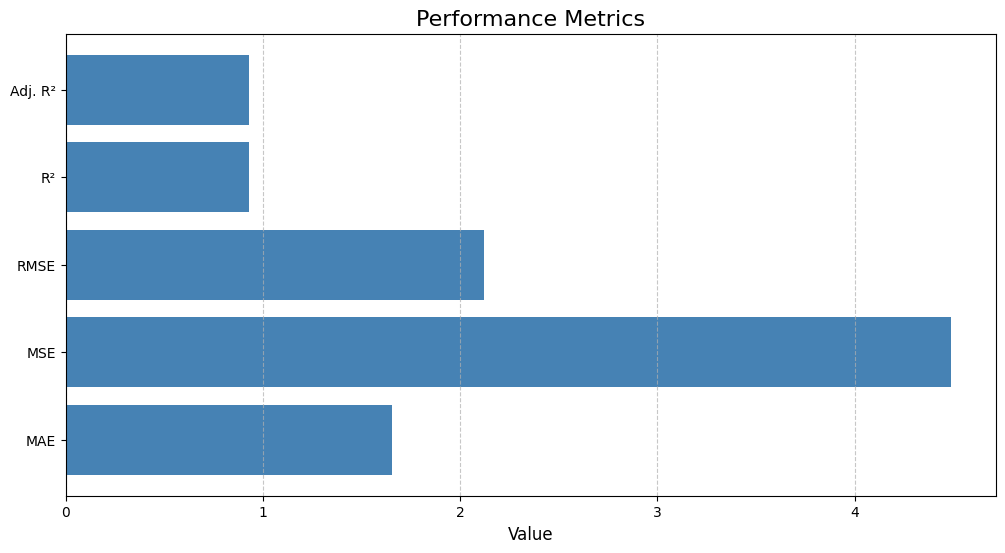

In [20]:
# Plotting the metrics as a bar chart
plt.figure(figsize=(12, 6))
plt.barh(metrics['Metric'], metrics['Value'], color='steelblue')
plt.xlabel('Value', fontsize=12)
plt.title('Performance Metrics', fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Overall, the model's performance is quite strong for a linear regression. With an R² of approximately 0.93, it explains nearly 93% of the variance in the data, indicating a good fit. The MAE, MSE, and RMSE values show that the model's predictions are relatively close to the actual values, with an average error of around 1.66 units. The adjusted R² further confirms that the model is not overfitting and generalizes well. All in all, these results suggest that the linear regression model is performing well, especially considering the simplicity of the approach.